In [3]:
from create_loops import *
import networkx as nx
%matplotlib widget 
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from Plateau_Problem.Triangulation_Meshing.tests.definir_cycle  import *


In [2]:
with open(ROOT + 'Results/ph_loops.pkl',"rb") as file:
    C = pickle.load(file)

In [4]:
C = Resiuals(data)
C.map_nodes()
C.create_graph()
C.create_graph_networkx()
C.untangle_graph()
C.fill_open_paths()
C.detect_cycles()

100%|██████████| 15684/15684 [00:00<00:00, 44489.68it/s]


In [5]:
cycle = max(C.cycles , key = lambda x : len(x))

In [33]:
Cycle_edges = set([(cycle[i],cycle[(i+1)%len(cycle)]) for i in range(len(cycle)-1)])
subgraph = C.graph_res_networkx.subgraph(cycle).copy()

degree_2 = [point for point in subgraph if subgraph.out_degree(point) == 2]
Dict_couples = dict()

for point in degree_2:
    e1,e2 = subgraph.neighbors(point)
    if (min(e1,e2),max(e1,e2)) in Dict_couples:
        Dict_couples[(min(e1,e2),max(e1,e2))].append(point)
    else:
        Dict_couples[(min(e1,e2),max(e1,e2))] = [point]

for couple in Dict_couples:
    s1,s2 = couple
    e1,e2 = Dict_couples[couple]
    if (e1,s1) in Cycle_edges :
        subgraph.remove_edge(e1,s1)
        subgraph.remove_edge(e2,s2)
    else:
        assert (e1,s2) in Cycle_edges, (e1,s2)
        subgraph.remove_edge(e1,s2)
        subgraph.remove_edge(e2,s1)





In [34]:
degree_3 = [point for point in subgraph if subgraph.out_degree(point) == 3]
Dict_trouples = dict()

for point in degree_3:
    e1,e2,e3 = subgraph.neighbors(point)
    e1,e2,e3 = sorted([e1,e2,e3])
    if (e1,e2,e3) in Dict_trouples:
        Dict_trouples[(e1,e2,e3)].append(point)
    else:
        Dict_trouples[(e1,e2,e3)] = [point]


for trouple in Dict_trouples: 
    s1,s2,s3 = trouple
    e1,e2,e3 = Dict_trouples[trouple]
    possible_edges = [(e,s) for e in [e1,e2,e3] for s in [s1,s2,s3]]
    subgraph.remove_edges_from(possible_edges)
    to_keep_cycles = [edge for edge in possible_edges if nx.has_path(subgraph,edge[1],edge[0]) ]
    subgraph.add_edges_from(to_keep_cycles)



In [37]:
to_keep_cycles
        

[(255818, 1579706), (903390, 1579705), (903406, 257500)]

In [140]:
degree_2 = [point for point in subgraph if M1.out_degree(point) == 2]

In [141]:
degree_2

[]

In [92]:
list(subgraph.neighbors(255818))

[257500, 1579705, 1579706]

(20.0, 65.0)

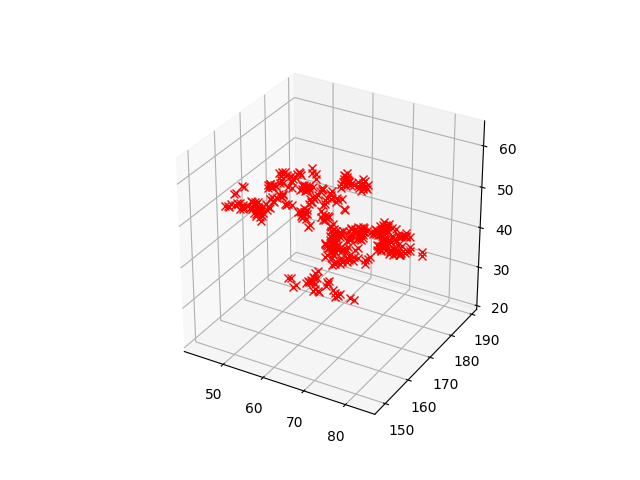

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')
X,Y,Z = [],[],[]

for point in cycle:
    point = transform_res_to_point(C.mapping[point])
    X.append(point[0])
    Y.append(point[1])
    Z.append(point[2])
# ax.plot(X,Y,Z)

for point in Badpoints:
    point = transform_res_to_point(C.mapping[point])
    ax.plot(point[0],point[1],point[2],color="red",marker="x")

# for square in ref_.squares:
#     A,B,M = [],[],[]
#     for point in square+[square[0]]:
#         A.append(point[0])
#         B.append(point[1])
#         M.append(point[2])
#     ax.plot(A,B,M)




X,Y,Z = np.array(X),np.array(Y),np.array(Z)
max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0 

mid_x = (X.max()+X.min()) * 0.5
mid_y = (Y.max()+Y.min()) * 0.5
mid_z = (Z.max()+Z.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)